# Sampling Distributions

A fundamental idea of statistics is the difference between a population and a sample. The population is an entire group, such as *every* adult in the world or *all* songs from the 80's. This population has some true, underlying distribution. For example, think about the ages of *every* person in the world, and what kind of curve that would make.

However, populations are usually too large for it to be feasible to gather data on every element within the population. If want to study the entire population, the best we can do is to gather a subset of the population. This subset is a sample, and it will (hopefully) resemble the entire population. For our above example, it would be like looking at all the ages of people in a single city, rather than the entire world.

As the sample is a subset of the population, it will not have the exact same distribution as the population, but will (hopefully) be similar. This distribution is called the **sampling distribution**. We're going to take a closer look at sampling distirbutions in this walk through.

Let's say we've gone into the world and collected some data from some population with an unknown distribution. This data is stored in `data1`. The first thing we want to do is look at our data and think about what it could mean for the true underlying population.

> Read in the provided data file and turn it from a "list" to a vector by typing the following two lines into the next cell. When you are finished, hold down the Shift key and hit Enter to execute the cell. This will run the code.

`data1<-read.table("data1")`  
`data1<-c(unlist(data1))`

In [1]:
data1<-read.table("data1")
data1<-c(unlist(data1))

What does this data set look like? Let's make a histogram! 

> 1. In the next cell, type
`hist(data1)` and hit Enter. (Do it now and then come back to complete the next steps.)  
2. Currently, you see "Frequency" or "Counts" on the y-axis. Let's change this to a "density" histogram, where the area of each bar represents the proportion of values in each corresponding bin. We can do this by including the `prob=TRUE` parameter in the function call. In the same cell, type `hist(data1, prob=TRUE)`.  
3. Let's change the title. Return to the cell and type `hist(data1,prob=T,main="My Amazing Histogram of Data1")`.

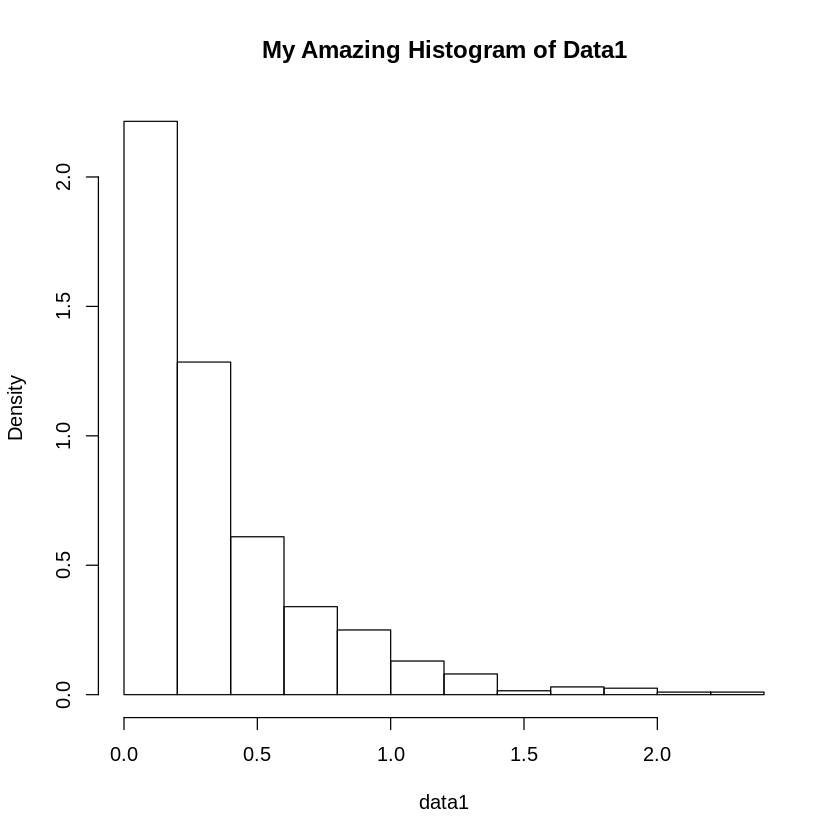

In [4]:
hist(data1,prob=T,main="My Amazing Histogram of Data1")

Note that each bar of our histogram has a width of 0.25. These bars are called "bins" and the 0.25 is the "bin width." We can use the parameter `breaks` to change the size of these bins.
>1. Find the maximum value in the data set by typing `max(data1)` in the cell below.  
2. Suppose that your maximum is 1.732. (It is not-- use the actual maximum that you see!) We are going to create a sequence of "breaks" for the histogram. We'll name it `br`. Return to the same cell and replace the code where you found the maximum with `br<-seq(0,1.8,0.1)`. Notice that we have rounded the maximum up to the nearest tenth to make sure we capture all of the data. The seq() function will create a vector of numbers from 0 to 1.8, each number being 0.1 apart from the next.
3. Return to this cell. Under your "breaks" code that is already there, type `hist(data1,prob=T,breaks=br,main="My First Data Set")`. Does this histogram tell you more information?
4. Repeat the process, but this time use `br<-seq(0, 1.8, 1)` (again, substitute 1.8 for the acutal maximum value, rounded up to the nearest tenth). Is this histogram better or worse?

[1] 2.368136

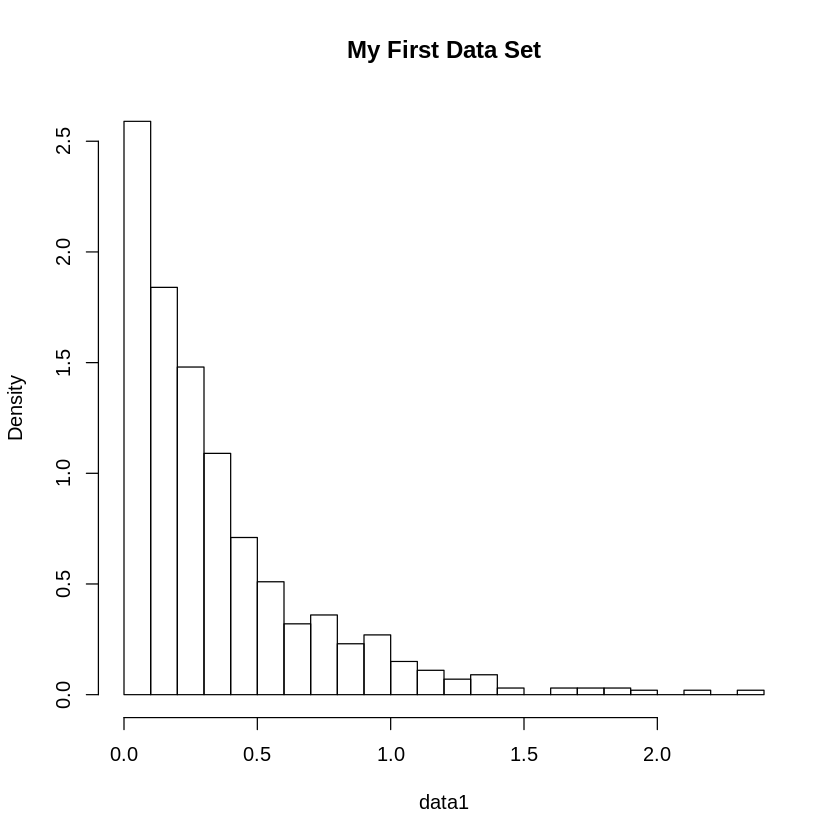

In [6]:
max(data1)
br<-seq(0,2.4,0.1)
hist(data1,prob=T,breaks=br,main="My First Data Set")

We can add more information to our histogram. Let's add lines displaying the mean and median.

> 1. Compute the sample mean and sample median of this data set by typing `mean(data1)` and `median(data1)`.
> 2. Replot your histogram in the cell below. In the following line of code, call the `abline()` function to add a vertical line to your plot. Specify the parameter `v=mean(data1)` to tell it that it will be vertical line at position `mean(data1)`. Color this line red with another parameter `col="red"`.
> 3. Call the `abline()` function again, but this time center it on the median and set the line's color to "blue."

[1] 0.3474632

[1] 0.2283705

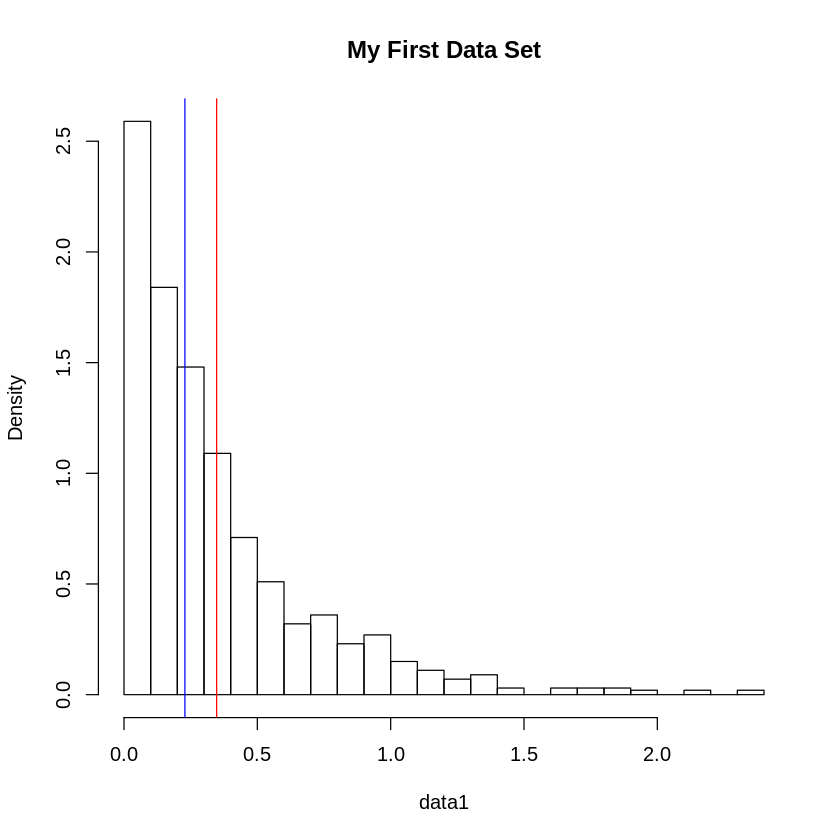

In [35]:
mean(data1)
median(data1)
mean_val <- mean(data1)
median_val <- median(data1)

hist(data1,prob=T,breaks=br,main="My First Data Set")

# Vertical red line for mean
abline(v = mean_val, col = "red")

# Vertical blue line for median
abline(v = median_val, col = "blue")

What if we want to know exactly how many values fell in the [0, 0.25] bin? We can get that information from the histogram as well!

> 1. Instead of calling `hist()`, save your histogram to a variable. For example: `h <- hist(data1)`.
2. Then we can access the attributes of the histogram by accessing h. One the next line of code, just type `h` and execute the cell. You can see all the attributes within the histogram, such as the locations of each break, the frequency count within each bin, etc.
3. You can access these values within `h` using the `$` and the name of the attribute. For example: `h$counts` would give you the vector of all the counts of items within each bin. Using this method, what was the frequency of the first bin?

$breaks
 [1] 0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.2 2.4

$counts
 [1] 443 257 122  68  50  26  16   3   6   5   2   2

$density
 [1] 2.215 1.285 0.610 0.340 0.250 0.130 0.080 0.015 0.030 0.025 0.010 0.010

$mids
 [1] 0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3

$xname
[1] "data1"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

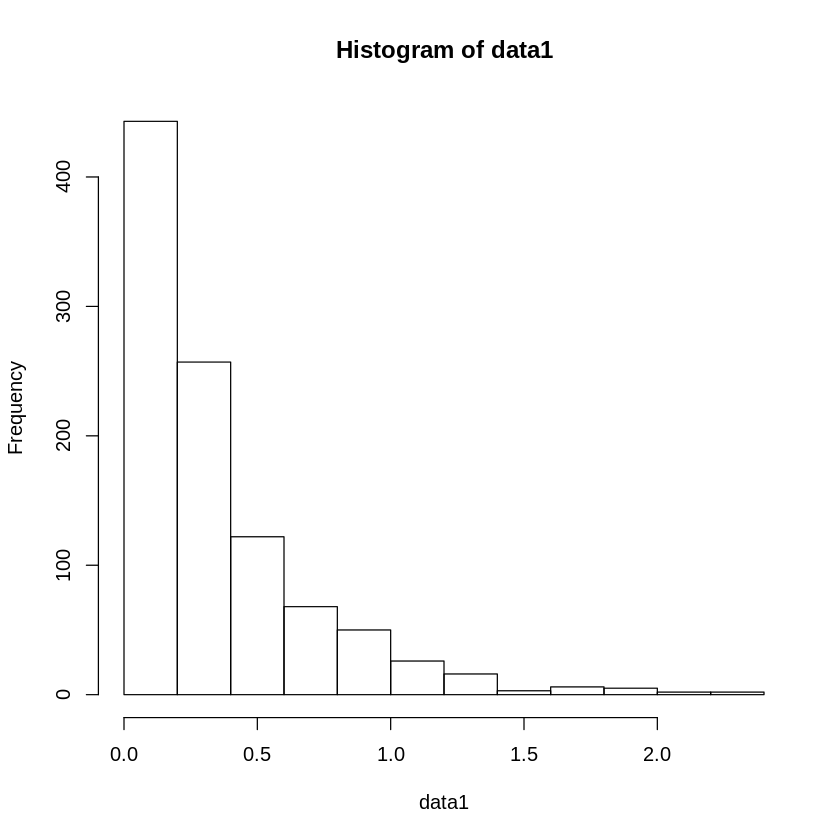

In [36]:
h <- hist(data1)
h

Now, what about our underlying distribution? Well, from the shape of the histogram, we can infer that our data follows a exponential distribution. The exponential distribution has a PDF of $y= \lambda e^{-\lambda x}$, where $\lambda$ is the "rate" parameter. Let's see if this matches our histogram!

> 1. We can estimate the rate parameter by calculating $1/\bar{x}$ (We will learn why and how this makes sense in the upcoming modules!). For us, that means `lambda = 1/mean(data1)`.
2. Then we want to calculate all the points along the line of the PDF. Let's create a sequence of numbers from 0 to 3 that are are not too far apart to our $x$ values: `x <- seq(0, 3, 0.1)`. 
3. Plug these values into our PDF equation: `y = lambda * exp(-lambda * x)`. These are the probability values for our PDF Now we just need to plot them.
4. Replot the histogram. Then, in the following line of code, call the `lines()` function to add a line ontop of the histogram. This will use our (x,y) points that we calculated. Let's color this line red. `lines(x, y, col="red")`. How well does our estimated curve follow the distribution?
5. Now, we're going to cheat a little bit. Generally, we will never know the true, underlying distribution of a sample, but we've done some spooky mathematics to learn that the population's true rate was $\lambda=3$. And another exponential distribution line to the histogram with $\lambda=3$ and color it blue. How well does our sample distribution match the population distribution? Are they *exactly* the same?

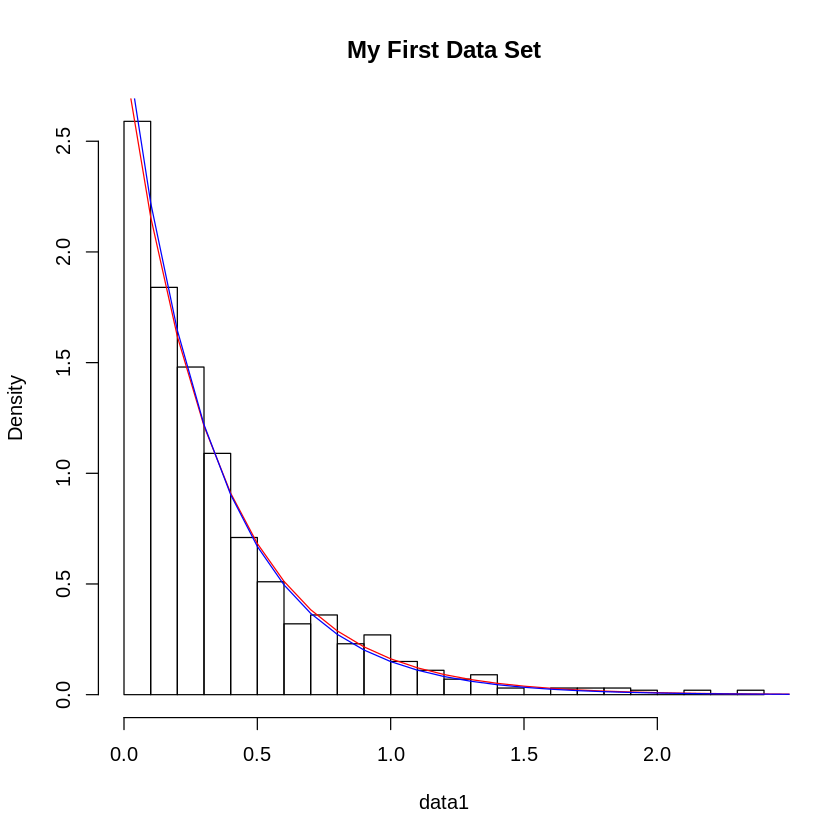

In [41]:
lambda = 1/mean(data1)
x <- seq(0, 3, 0.1)
y = lambda * exp(-lambda * x)
hist(data1,prob=T,breaks=br,main="My First Data Set")
lines(x, y, col="red")
lambda2 <- 3
y2 = lambda2 * exp(-lambda2 * x)
lines(x, y2, col="blue")